In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import geopandas as gpd
import gdown
from matplotlib.patches import Patch
import joblib
import ipywidgets as widgets
from IPython.display import display
import os
current_path = os.getcwd()
current_path

'/Users/rifkyfauzi/Library/CloudStorage/OneDrive-InstitutTeknologiSumatera/ITERA/Penelitian/Dengue Lampung/DBDKlim'

In [9]:
# shp, dbf, shx, cpg
link_peta = ["https://drive.google.com/file/d/1wz21t9fHMPPUzMhYbnVKXmeynJA3_Q1R/view?usp=sharing",
             "https://drive.google.com/file/d/1d9Sl456szdpS_6Yu9KzWIKI990gVF6R1/view?usp=sharing",
             "https://drive.google.com/file/d/1TvDdouMACJB2egfMOmnpC4uyjNOYb_ig/view?usp=sharing",
             "https://drive.google.com/file/d/16Z_4tmqI4IXPMu2Iq4crjnOYmKGxBB-w/view?usp=sharing"]

FILE_ID = ["1wz21t9fHMPPUzMhYbnVKXmeynJA3_Q1R",
           "1d9Sl456szdpS_6Yu9KzWIKI990gVF6R1",
           "1TvDdouMACJB2egfMOmnpC4uyjNOYb_ig",
           "16Z_4tmqI4IXPMu2Iq4crjnOYmKGxBB-w"]

filetypes = ["shp", "dbf", "shx", "cpg"]
for j in range(len(link_peta)):
  output = 'lampung.'+filetypes[j]
  gdown.download(f'https://drive.google.com/uc?export=download&id={FILE_ID[j]}', output, quiet=False)

shapefile_path = current_path+'/lampung.shp'  # Update this path
gdf = gpd.read_file(shapefile_path)

Downloading...
From: https://drive.google.com/uc?export=download&id=1wz21t9fHMPPUzMhYbnVKXmeynJA3_Q1R
To: /Users/rifkyfauzi/Library/CloudStorage/OneDrive-InstitutTeknologiSumatera/ITERA/Penelitian/Dengue Lampung/DBDKlim/lampung.shp
100%|██████████████████████████████████████| 14.1M/14.1M [00:04<00:00, 3.36MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1d9Sl456szdpS_6Yu9KzWIKI990gVF6R1
To: /Users/rifkyfauzi/Library/CloudStorage/OneDrive-InstitutTeknologiSumatera/ITERA/Penelitian/Dengue Lampung/DBDKlim/lampung.dbf
100%|███████████████████████████████████████| 28.7k/28.7k [00:00<00:00, 615kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1TvDdouMACJB2egfMOmnpC4uyjNOYb_ig
To: /Users/rifkyfauzi/Library/CloudStorage/OneDrive-InstitutTeknologiSumatera/ITERA/Penelitian/Dengue Lampung/DBDKlim/lampung.shx
100%|███████████████████████████████████████████| 220/220 [00:00<00:00, 234kB/s]
Downloading...
From: https://drive.google.com/uc?export=downl

In [10]:
# Membaca data dari file CSV
link = "https://docs.google.com/spreadsheets/d/1no7J1H6IgYdQBLpXx4xhpA2bmCPOfQ1x/pub?output=csv"
data = pd.read_csv(link)

link2 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRam8x5Or7Mi7O60b-qXsi1HiEBrG5gzo3TWJLyFhfqNb3flo00SN0Lyxs4gX2n5T_cpETMNYLr-Tgn/pub?output=csv"
dataAsli = pd.read_csv(link2)

# Melihat 5 baris pertama data
print(data.head())

# Mengecek informasi dasar
print(data.info())

# Mengecek statistik deskriptif
print(data.describe())

   Bulan  Tahun       Tn-2       Tn-1         Tn       Tx-2       Tx-1  \
0  Maret   2009  21.032258  21.392857  21.387097  31.483871  31.432143   
1  April   2009  21.392857  21.387097  21.066667  31.432143  32.741935   
2    Mei   2009  21.387097  21.066667  21.419355  32.741935  32.383333   
3   Juni   2009  21.066667  21.419355  20.266667  32.383333  32.548387   
4   Juli   2009  21.419355  20.266667  20.419355  32.548387  31.983333   

          Tx     Tavg-2     Tavg-1  ...     RH_avg        RR-2      RR-1  \
0  32.741935  27.722581  27.357143  ...  78.000000  295.687097  6.014286   
1  32.383333  27.357143  28.135484  ...  77.266667    6.014286  9.764516   
2  32.548387  28.135484  28.546667  ...  77.741935    9.764516  4.076667   
3  31.983333  28.546667  28.609677  ...  80.933333    4.076667  7.561290   
4  31.909677  28.609677  28.053333  ...  75.903226    7.561290  5.433333   

         RR      ss-2      ss-1        ss  I-2  I-1  Incidence  
0  9.764516  4.100000  2.432143  

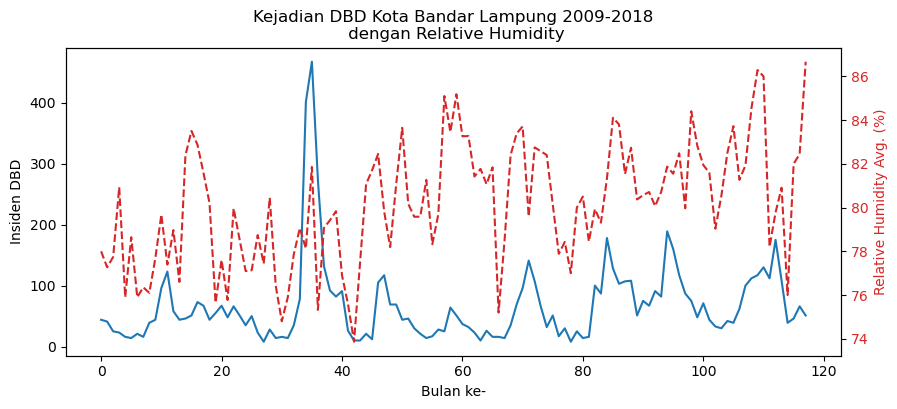

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title('Kejadian DBD Kota Bandar Lampung 2009-2018\n dengan Relative Humidity')
ax.plot(data['Incidence'])
ax.set_xlabel('Bulan ke-')
ax.set_ylabel('Insiden DBD')
ax2 = ax.twinx()
ax2.plot(data['RH_avg'], '--',color='tab:red')
ax2.set_ylabel('Relative Humidity Avg. (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.show()


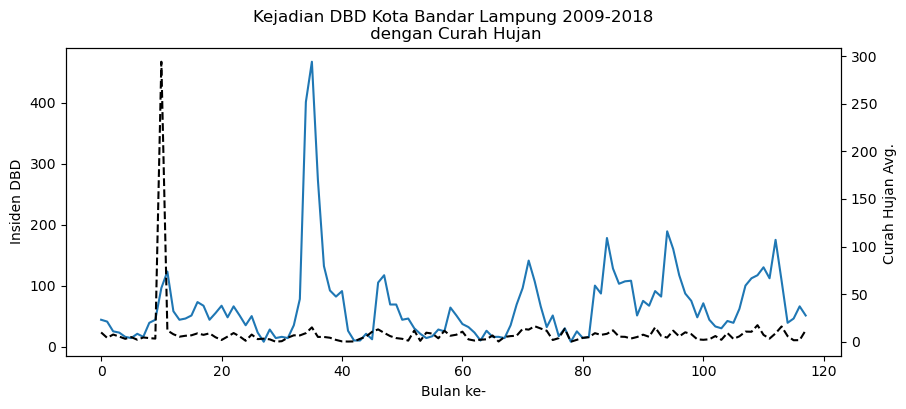

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title('Kejadian DBD Kota Bandar Lampung 2009-2018\n dengan Curah Hujan')
ax.plot(data['Incidence'])
ax.set_xlabel('Bulan ke-')
ax.set_ylabel('Insiden DBD')
ax2 = ax.twinx()
ax2.plot(data['RR'], '--',color='black')
ax2.set_ylabel('Curah Hujan Avg. ', color='black')
ax2.tick_params(axis='y', labelcolor='black')
plt.show()


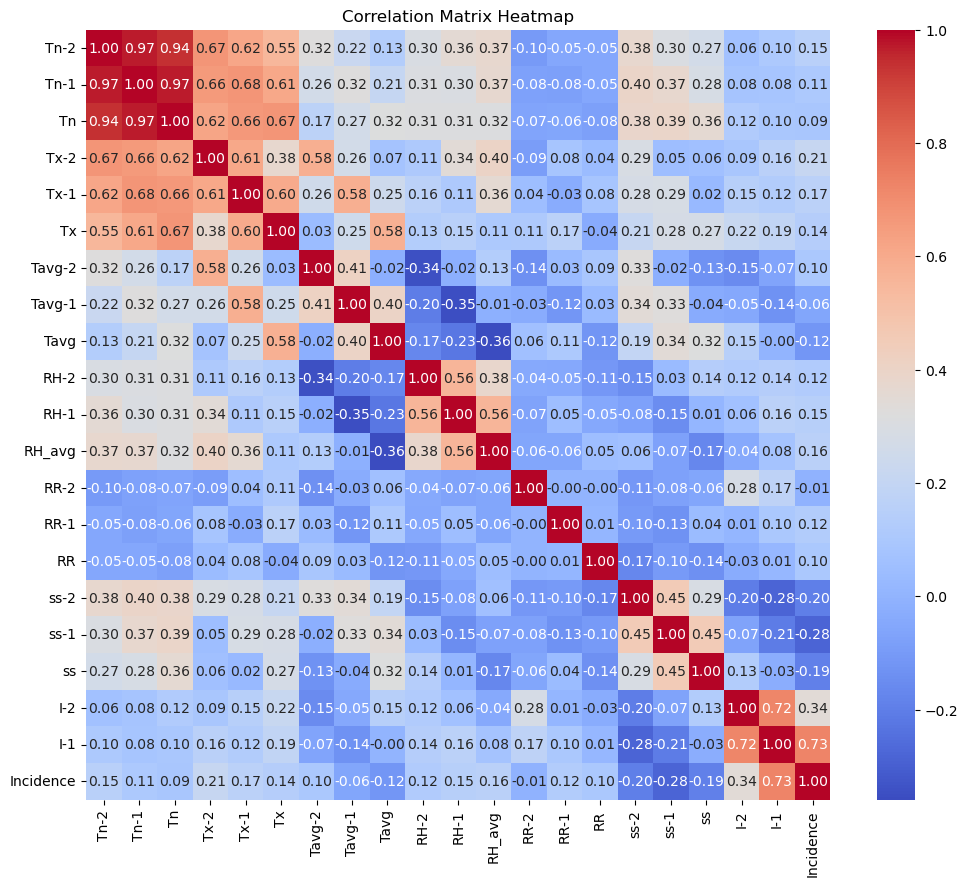

In [13]:
dat = data.drop(['Bulan', 'Tahun'], axis=1)
corr_matrix = dat.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
incidence_corr = corr_matrix['Incidence']
selected_features = incidence_corr[abs(incidence_corr) > 0.1]
selected_features = selected_features[selected_features < 1]
print(selected_features)
selected_features_index = selected_features.index
print(selected_features_index)

Tn-2      0.151035
Tn-1      0.107433
Tx-2      0.213887
Tx-1      0.166255
Tx        0.138947
Tavg-2    0.100100
Tavg     -0.118163
RH-2      0.119831
RH-1      0.148512
RH_avg    0.160372
RR-1      0.124113
ss-2     -0.195073
ss-1     -0.284105
ss       -0.192154
I-2       0.343932
I-1       0.726428
Name: Incidence, dtype: float64
Index(['Tn-2', 'Tn-1', 'Tx-2', 'Tx-1', 'Tx', 'Tavg-2', 'Tavg', 'RH-2', 'RH-1',
       'RH_avg', 'RR-1', 'ss-2', 'ss-1', 'ss', 'I-2', 'I-1'],
      dtype='object')


In [15]:
# Memastikan tidak ada nilai yang hilang
data = data.dropna()

# Memisahkan fitur dan target
X = data[selected_features_index]
y = data['Incidence']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# shp, dbf, shx, cpg
link_model = "https://drive.google.com/file/d/1BJlWRJPErs3eSmOkPS_S_j8vt6vYkcbO/view?usp=sharing"
FILE_ID = "1BJlWRJPErs3eSmOkPS_S_j8vt6vYkcbO"
filetype = "pkl"

output = 'random_forest_model.'+filetype
gdown.download(f'https://drive.google.com/uc?export=download&id={FILE_ID}', output, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1BJlWRJPErs3eSmOkPS_S_j8vt6vYkcbO
To: /Users/rifkyfauzi/Library/CloudStorage/OneDrive-InstitutTeknologiSumatera/ITERA/Penelitian/Dengue Lampung/DBDKlim/random_forest_model.pkl
100%|█████████████████████████████████████████| 107k/107k [00:00<00:00, 743kB/s]


'random_forest_model.pkl'

In [20]:
try:
  model_path = current_path+"/random_forest_model.pkl"
  best_model = joblib.load(model_path)
  print("Model loaded successfully.")
except:
  param_grid = {
      'n_estimators': [10, 50, 100],
      'max_depth': [None, 2, 10, 20],
      'min_samples_split': [2, 5, 10, 20],
      'min_samples_leaf': [1, 2, 4, 8]
  }

  # Inisialisasi model Random Forest Regressor
  model = RandomForestRegressor()

  # Melatih model
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
  grid_search.fit(X_train, y_train)

  print("Best parameters:", grid_search.best_params_)
  print("Best score:", grid_search.best_score_)


  best_model = grid_search.best_estimator_
  # Save the trained model to a file
  joblib.dump(best_model, 'random_forest_model.pkl')

Model loaded successfully.


In [21]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 41.71172133946675
R²: 0.01950130562064245


['random_forest_model.pkl']

In [22]:
y_pred_train = best_model.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 46.071900272183925
R²: 0.5765043248632925


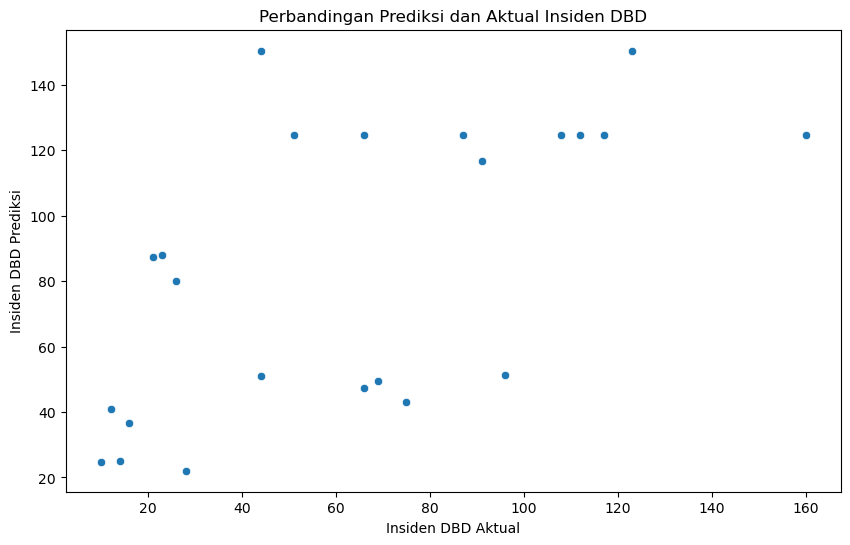

In [23]:
# Plot prediksi vs realisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Insiden DBD Aktual')
plt.ylabel('Insiden DBD Prediksi')
plt.title('Perbandingan Prediksi dan Aktual Insiden DBD')
plt.show()

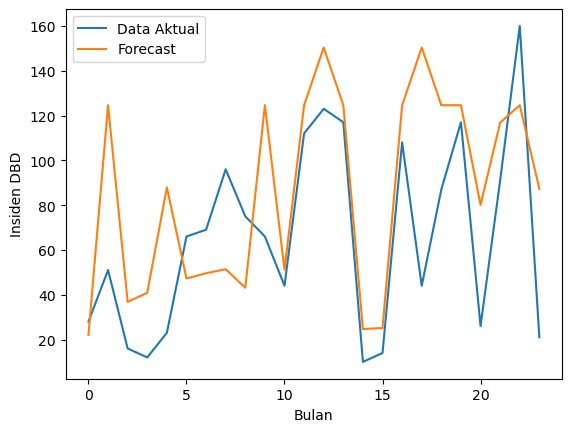

In [24]:
plt.plot(y_test.values, label='Data Aktual')
plt.plot(y_pred, label='Forecast')
plt.xlabel('Bulan')
plt.ylabel('Insiden DBD')
plt.legend()
plt.show()

In [25]:
def calculate_dbd_incidence(number_of_cases, population):
    incidence_rate = (number_of_cases / population) * 100000
    return incidence_rate

def classify_incidence_rate(ai_values):
    classifications = []
    for ai in ai_values:
        if ai < 3:
            classifications.append("Aman")
        elif 3 <= ai < 10:
            classifications.append("Waspada")
        else:
            classifications.append("Awas")
    return classifications

def calculate_accuracy_and_create_table(actual_list, predicted_list):
    # Calculate accuracy
    accuracy = accuracy_score(actual_list, predicted_list)

    # Create a pandas DataFrame
    df = pd.DataFrame({
        'Actual': actual_list,
        'Predicted': predicted_list
    })

    return accuracy, df



In [26]:
# Example usage:
population_lampung = 1000000  # Example population of Lampung


dbd_incidence_rate = calculate_dbd_incidence(y_test.values, population_lampung)
print(dbd_incidence_rate)

predicted_incidence_rate = calculate_dbd_incidence(y_pred, population_lampung)
print(predicted_incidence_rate)

[ 2.8  5.1  1.6  1.2  2.3  6.6  6.9  9.6  7.5  6.6  4.4 11.2 12.3 11.7
  1.   1.4 10.8  4.4  8.7 11.7  2.6  9.1 16.   2.1]
[ 2.20514262 12.46053952  3.67792544  4.08813891  8.7897345   4.72483459
  4.95949365  5.13979668  4.31097764 12.46053952  5.11270438 12.46053952
 15.03678952 12.46053952  2.46878313  2.51409001 12.46053952 15.03678952
 12.46053952 12.46053952  8.00901011 11.68251947 12.46053952  8.72818688]


In [27]:
dbd_incidence_class = classify_incidence_rate(dbd_incidence_rate)
print(dbd_incidence_class)

predicted_incidence_class = classify_incidence_rate(predicted_incidence_rate)
print(dbd_incidence_class)


['Aman', 'Waspada', 'Aman', 'Aman', 'Aman', 'Waspada', 'Waspada', 'Waspada', 'Waspada', 'Waspada', 'Waspada', 'Awas', 'Awas', 'Awas', 'Aman', 'Aman', 'Awas', 'Waspada', 'Waspada', 'Awas', 'Aman', 'Waspada', 'Awas', 'Aman']
['Aman', 'Waspada', 'Aman', 'Aman', 'Aman', 'Waspada', 'Waspada', 'Waspada', 'Waspada', 'Waspada', 'Waspada', 'Awas', 'Awas', 'Awas', 'Aman', 'Aman', 'Awas', 'Waspada', 'Waspada', 'Awas', 'Aman', 'Waspada', 'Awas', 'Aman']


In [28]:
accuracy, df = calculate_accuracy_and_create_table(dbd_incidence_class, predicted_incidence_class)
accuracy, df

(0.5833333333333334,
      Actual Predicted
 0      Aman      Aman
 1   Waspada      Awas
 2      Aman   Waspada
 3      Aman   Waspada
 4      Aman   Waspada
 5   Waspada   Waspada
 6   Waspada   Waspada
 7   Waspada   Waspada
 8   Waspada   Waspada
 9   Waspada      Awas
 10  Waspada   Waspada
 11     Awas      Awas
 12     Awas      Awas
 13     Awas      Awas
 14     Aman      Aman
 15     Aman      Aman
 16     Awas      Awas
 17  Waspada      Awas
 18  Waspada      Awas
 19     Awas      Awas
 20     Aman   Waspada
 21  Waspada      Awas
 22     Awas      Awas
 23     Aman   Waspada)

In [29]:
dbd_incidence_rate_train = calculate_dbd_incidence(y_train.values, population_lampung)
train_incidence_rate = calculate_dbd_incidence(y_pred_train, population_lampung)
print(dbd_incidence_rate_train)

dbd_incidence_rate_test = calculate_dbd_incidence(y_test.values, population_lampung)
test_incidence_rate = calculate_dbd_incidence(y_pred, population_lampung)


dbd_incidence_class_train = classify_incidence_rate(dbd_incidence_rate_train)
train_incidence_class = classify_incidence_rate(train_incidence_rate)


accuracy, df = calculate_accuracy_and_create_table(dbd_incidence_class_train, train_incidence_class)
accuracy, df

[ 2.1  5.8  5.1  9.6 10.   3.5  1.6  6.6 27.3  1.7  1.6  1.6  2.3 10.7
  4.4  7.8  3.9  3.5  2.8 11.7 17.8  1.4  3.   1.4  8.2  6.9 46.7  7.3
  1.6 40.1 12.8  1.6  1.  17.5  0.8  0.8  5.5 18.9  3.   5.   3.9  4.4
  8.7  2.3  6.7  9.2  6.7  2.1  1.7  4.4  8.2  1.4  4.4 11.2 10.5  1.4
  3.2  3.9  2.5  4.6  2.6  6.4  6.9  7.1  2.5  5.1  3.5 13.   5.1  1.
  7.5 13.2  1.4  4.2  4.1  3.   4.8  2.5  5.1  4.8 10.7 10.8  3.2 10.3
 10.   5.1  6.7  3.7 14.1  6.2  4.6  9.1  4.6  3.3]


(0.7872340425531915,
      Actual Predicted
 0      Aman      Aman
 1   Waspada      Awas
 2   Waspada   Waspada
 3   Waspada   Waspada
 4      Awas   Waspada
 ..      ...       ...
 89  Waspada   Waspada
 90  Waspada   Waspada
 91  Waspada   Waspada
 92  Waspada   Waspada
 93  Waspada   Waspada
 
 [94 rows x 2 columns])

In [30]:
date_rng = pd.date_range('2009-03-01','2018-12-31', freq='MS')
date_train = date_rng[2:-22]
date_test = date_rng[-24:]


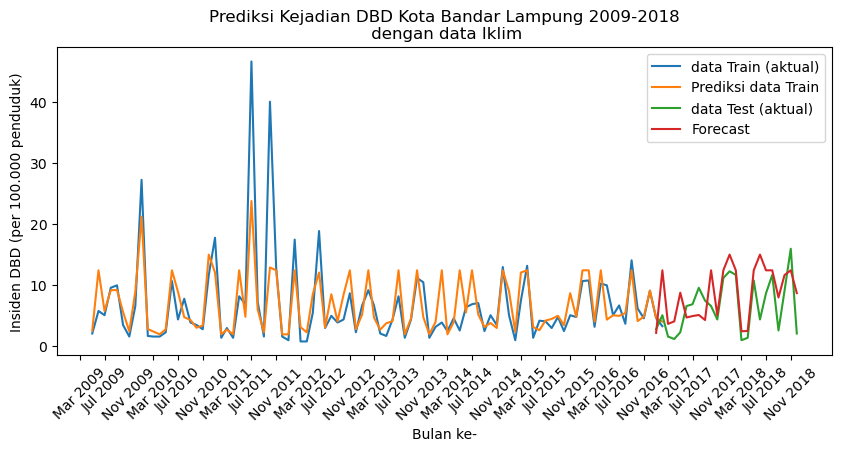

In [31]:
plt.subplots(figsize=(10,4))
plt.plot(date_train, dbd_incidence_rate_train, label='data Train (aktual)')
plt.plot(date_train, train_incidence_rate, label='Prediksi data Train')
plt.plot(date_test, dbd_incidence_rate_test, label='data Test (aktual)')
plt.plot(date_test, test_incidence_rate, label='Forecast')
# plt.plot(y_predNN, label='Prediksi NN')
# plt.axis([0, len(y_test), 0, 250])
plt.title('Prediksi Kejadian DBD Kota Bandar Lampung 2009-2018\n dengan data Iklim')
plt.xlabel('Bulan ke-')
plt.ylabel('Insiden DBD (per 100.000 penduduk)')
plt.xticks(date_rng[::4], [d.strftime('%b %Y') for d in date_rng[::4]], rotation=45)
plt.legend()
plt.show()

In [32]:
color_map = {
    "Aman": "green",
    "Waspada": "yellow",
    "Awas": "red",
    "Unknown": "grey"
}

peluang_dict = {
    "Lampung Barat": 0.011680144,
    "Tanggamus": 0.09703504,
    "Lampung Selatan": 0.216531896,
    "Lampung Timur": 0.184186882,
    "Lampung Tengah": 0.097933513,
    "Lampung Utara": 0.095238095,
    "Way Kanan": 0.056603774,
    "Tulangbawang": 0.017070979,
    "Pesawaran": 0.208445642,
    "Pringsewu": 0.502246181,
    "Mesuji": 0.009883199,
    "Tulang Bawang Barat": 0.026954178,
    "Pesisir Barat": 0.004492363,
    "Kota Bandar Lampung": 1,
    "Kota Metro": 0.052111411
}


In [49]:
X_train.index[k]

70

In [50]:
data.iloc[69]['Bulan']

'Desember'

In [35]:
dbd_incidence_rate_train[k]

9.6

In [33]:
k = 3
gdf['Status'] = 'Unknown'
gdf['AI'] = ''
gdf.loc[gdf['WADMKK'] == 'Kota Bandar Lampung', 'AI'] = np.round(dbd_incidence_rate_train[k],2)
gdf.loc[gdf['WADMKK'] == 'Kota Bandar Lampung', 'Status'] = train_incidence_class[k]
gdf['Color'] = gdf['Status'].map(color_map)
gdf.head()

,WADMKK,OBJECTID,NAMOBJ,FCODE,REMARK,METADATA,SRS_ID,KDBBPS,KDCBPS,KDCPUM,...,WIADKC,WIADKK,WIADPR,WIADKD,UUPP,LUAS,geometry,Status,AI,Color
0,Kota Bandar Lampung,22524.0,Gunungagung,BA03070040,None,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,4326,None,None,18.71.16,...,None,None,None,0,Hasil Delineasi Batas Desa 2019,1.169502,"MULTIPOLYGON Z (((105.25126 -5.48924 0.00000, ...",Waspada,9.6,yellow
1,Kota Metro,22533.0,Hadimulyo Barat,BA03070040,None,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,4326,None,None,18.72.01,...,None,None,None,0,Hasil Delineasi Batas Desa 2019,1.873267,"POLYGON Z ((105.30739 -5.17030 0.00000, 105.30...",Unknown,,grey
2,Lampung Barat,22527.0,Gunungratu,BA03070040,None,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,4326,None,None,18.04.23,...,None,None,None,0,Hasil Delineasi Batas Desa 2019,10.102952,"POLYGON Z ((104.07656 -5.11131 0.00000, 104.07...",Unknown,,grey
3,Lampung Selatan,22535.0,Haduyang,BA03070040,None,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,4326,None,None,18.01.04,...,None,None,None,0,Hasil Kegiatan PNBP Tahun 2018,8.417160,"MULTIPOLYGON Z (((105.34362 -5.56009 0.00000, ...",Unknown,,grey
4,Lampung Tengah,22536.0,Haduyang Ratu,BA03070040,None,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,4326,None,None,18.02.03,...,None,None,None,0,Hasil Delineasi Batas Desa 2019,21.679751,"MULTIPOLYGON Z (((104.93114 -5.26151 0.00000, ...",Unknown,,grey


/var/folders/kk/n69k8kxs3xg9gbzfmwrc4xfm0000gn/T/ipykernel_6736/2808135973.py:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(column='color', ax=ax, color=gdf['Color'], edgecolor='black')


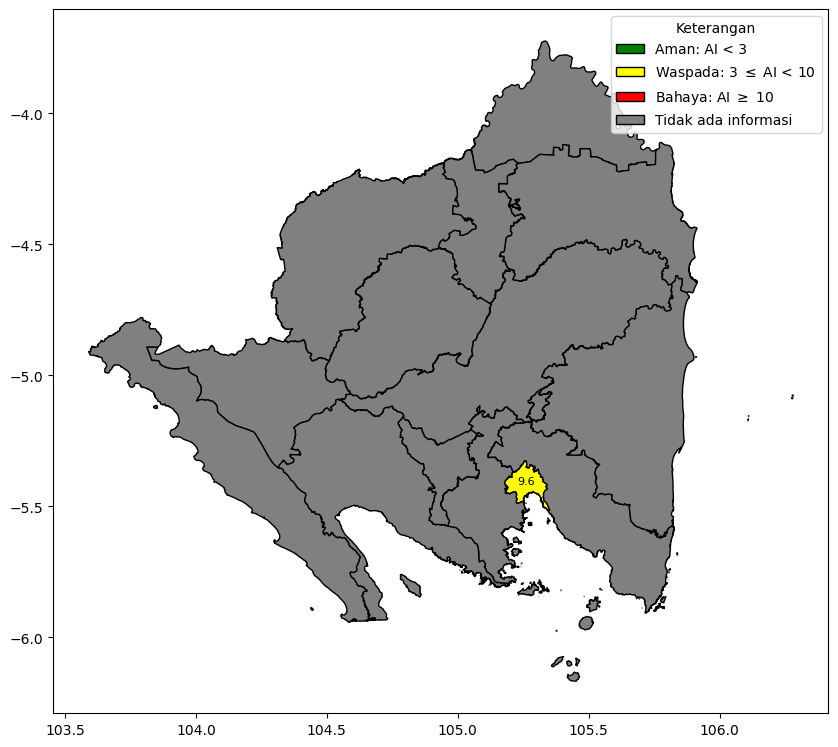

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='color', ax=ax, color=gdf['Color'], edgecolor='black')
# Annotate each row with values from the 'AI' column
for idx, row in gdf.iterrows():
    # Get the centroid of the geometry for placing the annotation
    centroid = row['geometry'].centroid
    # Annotate with the value from the 'AI' column
    plt.text(centroid.x, centroid.y, str(row['AI']), horizontalalignment='center', fontsize=8, color='black')


# Create a custom legend
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Aman: AI < 3'),
    Patch(facecolor='yellow', edgecolor='black', label=r'Waspada: 3 $\leq$ AI < 10'),
    Patch(facecolor='red', edgecolor='black', label=r'Bahaya: AI $\geq$ 10'),
    Patch(facecolor='grey', edgecolor='black', label='Tidak ada informasi')
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right', title='Keterangan')

# Show the plot
plt.show()

In [ ]:

np.round(dbd_incidence_rate_train[3],2)

9.6

# Risiko DBD

In [ ]:
k = 3
gdf['Status'] = 'Unknown'
gdf['AI'] = ''
gdf.loc[gdf['WADMKK'] == 'Kota Bandar Lampung', 'AI'] = np.round(dbd_incidence_rate_train[k],2)
gdf.loc[gdf['WADMKK'] == 'Kota Bandar Lampung', 'Status'] = train_incidence_class[k]
gdf['Color'] = gdf['Status'].map(color_map)
gdf.head()

In [ ]:
# Define options for the first dropdown menu
options1 = ['Option A1', 'Option A2', 'Option A3']

# Define options for the second dropdown menu
options2 = ['Option B1', 'Option B2', 'Option B3']

# Create the first dropdown menu
dropdown1 = widgets.Dropdown(
    options=years,
    value=2018,  # Default value
    description='Tahun:',
    disabled=False,
)

# Create the second dropdown menu
dropdown2 = widgets.Dropdown(
    options=months,
    value='Januari',  # Default value
    description='Bulan:',
    disabled=False,
)

# Define a function to handle the first dropdown selection
def on_dropdown1_change(change):
    print(f'Selected from A: {change["new"]}')

# Define a function to handle the second dropdown selection
def on_dropdown2_change(change):
    print(f'Selected from B: {change["new"]}')

# Attach the functions to the respective dropdowns
dropdown1.observe(on_dropdown1_change, names='value')
dropdown2.observe(on_dropdown2_change, names='value')

# Display the dropdown menus side by side
display(widgets.HBox([dropdown1, dropdown2]))

In [ ]:
selected_year = dropdown1.value
selected_month = dropdown2.value

dat = data[(data['Tahun'] == selected_year) & (data['Bulan'] == selected_month)]

,Bulan,Tahun,Tn-2,Tn-1,Tn,Tx-2,Tx-1,Tx,Tavg-2,Tavg-1,...,RH_avg,RR-2,RR-1,RR,ss-2,ss-1,ss,I-2,I-1,Incidence
106,Januari,2018,26.375,25.407407,25.0,33.352381,32.766667,32.346667,28.655,27.76,...,81.266667,9.207692,2.97037,5.693333,4.9625,7.814815,2.9,42,39,62


In [ ]:
years = data['Tahun'].unique()
months = data['Bulan'].unique()
months

array(['Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September',
       'Oktober', 'November', 'Desember', 'Januari', 'Februari'],
      dtype=object)

In [ ]:
y_test.iloc[3]


12

In [ ]:
y_pred_train[3]

75.98556457594692

In [ ]:
X_train.iloc[3].to_excel('input.xlsx')

In [ ]:
def plotter():
  k = 3
  gdf['Status'] = 'Unknown'
  gdf['AI'] = ''
  gdf.loc[gdf['WADMKK'] == 'Kota Bandar Lampung', 'AI'] = np.round(dbd_incidence_rate_train[k],2)
  gdf.loc[gdf['WADMKK'] == 'Kota Bandar Lampung', 'Status'] = train_incidence_class[k]
  gdf['Color'] = gdf['Status'].map(color_map)
  gdf.head()

<Axes: >

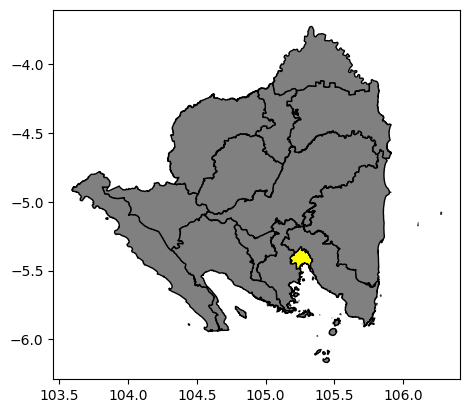

In [ ]:
# Plot the shapefile with the assigned colors
gdf.plot(color=gdf['Color'], edgecolor='black')

# Prediksi 3 Bulan Ke Depan

In [ ]:
dataAsli.head()

,Bulan,Tahun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,Incidence
0,Januari,2009,21.032258,31.483871,27.722581,76.870968,295.687097,4.100000,5.419355,1.612903,303
1,Februari,2009,21.392857,31.432143,27.357143,78.857143,6.014286,2.432143,5.821429,1.714286,155
2,Maret,2009,21.387097,32.741935,28.135484,78.000000,9.764516,4.658065,6.064516,1.612903,44
3,April,2009,21.066667,32.383333,28.546667,77.266667,4.076667,5.263333,5.900000,1.666667,41
4,Mei,2009,21.419355,32.548387,28.609677,77.741935,7.561290,4.887097,5.741935,1.580645,25


In [ ]:
# prompt: make function to create new dataset  for Tn with lag -1 and lag -2, but Incidence for lag-1, lag-2 also lag+1 and lag+2

def create_lagged_dataset(df, target_col, lag_values):
  """
  Creates a new dataset with lagged values for the target variable and other columns.

  Args:
    df: The input pandas DataFrame.
    target_col: The name of the target column.
    lag_values: A list of lag values (e.g., [-2, -1, 1, 2]).

  Returns:
    A new pandas DataFrame with lagged values.
  """
  df_lagged = df.copy()

  for lag in lag_values:
    # Lag the target variable
    df_lagged[f'{target_col}_lag_{lag}'] = df_lagged[target_col].shift(-lag)


  return df_lagged


In [ ]:
len(dataAsli), dataAsli.columns

(120,
 Index(['Bulan', 'Tahun', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x',
        'ff_avg', 'Incidence'],
       dtype='object'))

In [ ]:
df3 = create_lagged_dataset(dataAsli, 'Tn', [-2,-1])
df3 = create_lagged_dataset(df3, 'Tx', [-2,-1])
df3 = create_lagged_dataset(df3, 'Tavg', [-2,-1])
df3 = create_lagged_dataset(df3, 'RH_avg', [-2,-1])
df3 = create_lagged_dataset(df3, 'RR', [-2,-1])
df3 = create_lagged_dataset(df3, 'ss', [-2,-1])
df3 = create_lagged_dataset(df3, 'Incidence', [-2,-1,1,2])
df3 = df3.dropna()
df3

,Bulan,Tahun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,...,RH_avg_lag_-2,RH_avg_lag_-1,RR_lag_-2,RR_lag_-1,ss_lag_-2,ss_lag_-1,Incidence_lag_-2,Incidence_lag_-1,Incidence_lag_1,Incidence_lag_2
2,Maret,2009,21.387097,32.741935,28.135484,78.000000,9.764516,4.658065,6.064516,1.612903,...,76.870968,78.857143,295.687097,6.014286,4.100000,2.432143,303.0,155.0,41.0,25.0
3,April,2009,21.066667,32.383333,28.546667,77.266667,4.076667,5.263333,5.900000,1.666667,...,78.857143,78.000000,6.014286,9.764516,2.432143,4.658065,155.0,44.0,25.0,23.0
4,Mei,2009,21.419355,32.548387,28.609677,77.741935,7.561290,4.887097,5.741935,1.580645,...,78.000000,77.266667,9.764516,4.076667,4.658065,5.263333,44.0,41.0,23.0,16.0
5,Juni,2009,20.266667,31.983333,28.053333,80.933333,5.433333,3.606667,5.900000,1.666667,...,77.266667,77.741935,4.076667,7.561290,5.263333,4.887097,41.0,25.0,16.0,14.0
6,Juli,2009,20.419355,31.909677,28.335484,75.903226,3.048387,5.300000,5.645161,1.612903,...,77.741935,80.933333,7.561290,5.433333,4.887097,3.606667,25.0,23.0,14.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Juni,2018,25.578947,33.036364,29.280000,78.200000,3.276923,4.842857,4.476190,1.857143,...,86.285714,86.000000,17.400000,7.190000,4.000000,4.837500,117.0,130.0,175.0,108.0
114,Juli,2018,24.684211,32.707143,28.055556,79.777778,8.790000,6.473684,5.857143,3.714286,...,86.000000,78.200000,7.190000,3.276923,4.837500,4.842857,130.0,112.0,108.0,39.0
115,Agustus,2018,25.391304,32.535000,28.038095,80.904762,16.033333,6.225000,7.640000,4.840000,...,78.200000,79.777778,3.276923,8.790000,4.842857,6.473684,112.0,175.0,39.0,46.0
116,September,2018,25.545455,33.775000,28.600000,76.000000,5.850000,6.658333,6.428571,4.571429,...,79.777778,80.904762,8.790000,16.033333,6.473684,6.225000,175.0,108.0,46.0,66.0


In [ ]:
dat3 = df3.drop(['Bulan', 'Tahun', 'ff_x', 'ff_avg'], axis=1)
dat3

,Tn,Tx,Tavg,RH_avg,RR,ss,Incidence,Tn_lag_-2,Tn_lag_-1,Tx_lag_-2,...,RH_avg_lag_-2,RH_avg_lag_-1,RR_lag_-2,RR_lag_-1,ss_lag_-2,ss_lag_-1,Incidence_lag_-2,Incidence_lag_-1,Incidence_lag_1,Incidence_lag_2
2,21.387097,32.741935,28.135484,78.000000,9.764516,4.658065,44,21.032258,21.392857,31.483871,...,76.870968,78.857143,295.687097,6.014286,4.100000,2.432143,303.0,155.0,41.0,25.0
3,21.066667,32.383333,28.546667,77.266667,4.076667,5.263333,41,21.392857,21.387097,31.432143,...,78.857143,78.000000,6.014286,9.764516,2.432143,4.658065,155.0,44.0,25.0,23.0
4,21.419355,32.548387,28.609677,77.741935,7.561290,4.887097,25,21.387097,21.066667,32.741935,...,78.000000,77.266667,9.764516,4.076667,4.658065,5.263333,44.0,41.0,23.0,16.0
5,20.266667,31.983333,28.053333,80.933333,5.433333,3.606667,23,21.066667,21.419355,32.383333,...,77.266667,77.741935,4.076667,7.561290,5.263333,4.887097,41.0,25.0,16.0,14.0
6,20.419355,31.909677,28.335484,75.903226,3.048387,5.300000,16,21.419355,20.266667,32.548387,...,77.741935,80.933333,7.561290,5.433333,4.887097,3.606667,25.0,23.0,14.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,25.578947,33.036364,29.280000,78.200000,3.276923,4.842857,112,25.450000,24.857143,32.850000,...,86.285714,86.000000,17.400000,7.190000,4.000000,4.837500,117.0,130.0,175.0,108.0
114,24.684211,32.707143,28.055556,79.777778,8.790000,6.473684,175,24.857143,25.578947,32.975000,...,86.000000,78.200000,7.190000,3.276923,4.837500,4.842857,130.0,112.0,108.0,39.0
115,25.391304,32.535000,28.038095,80.904762,16.033333,6.225000,108,25.578947,24.684211,33.036364,...,78.200000,79.777778,3.276923,8.790000,4.842857,6.473684,112.0,175.0,39.0,46.0
116,25.545455,33.775000,28.600000,76.000000,5.850000,6.658333,39,24.684211,25.391304,32.707143,...,79.777778,80.904762,8.790000,16.033333,6.473684,6.225000,175.0,108.0,46.0,66.0




---





---



In [ ]:
dat3[selected_predicted_index]

,Incidence,Incidence_lag_1,Incidence_lag_2
2,44,41.0,25.0
3,41,25.0,23.0
4,25,23.0,16.0
5,23,16.0,14.0
6,16,14.0,21.0
...,...,...,...
113,112,175.0,108.0
114,175,108.0,39.0
115,108,39.0,46.0
116,39,46.0,66.0


In [ ]:
# Memisahkan fitur dan target
selected_predicted_index = ['Incidence', 'Incidence_lag_1',	'Incidence_lag_2']
X3 = dat3.drop(selected_predicted_index, axis=1)
y3 = dat3[selected_predicted_index]

# Membagi data menjadi training dan testing set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
# shp, dbf, shx, cpg
link_model3 = "https://drive.google.com/file/d/10ckDAOd7t66ViG7LkFJRT8Ti-FAuallF/view?usp=sharing"
FILE_ID3 = "10ckDAOd7t66ViG7LkFJRT8Ti-FAuallF"
filetype3 = "pkl"

output3 = 'random_forest_model3.'+filetype3
gdown.download(f'https://drive.google.com/uc?export=download&id={FILE_ID3}', output3, quiet=False)

try:
  model_path3 = "/content/random_forest_model3.pkl"
  best_model3 = joblib.load(model_path3)
  print("Model loaded successfully.")
except:
  param_grid = {
        'n_estimators': [50, 60, 100],
        'max_depth': [None, 2, 8, 10, 12, 15, 20],
        'min_samples_split': [10, 20, 30, 40, 50],
        'min_samples_leaf': [3, 4, 5]
    }

  # Inisialisasi model Random Forest Regressor
  model3 = RandomForestRegressor()

  # Melatih model
  grid_search3 = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
  grid_search3.fit(X_train3, y_train3)

  print("Best parameters:", grid_search3.best_params_)
  print("Best score:", grid_search3.best_score_)


  best_model3 = grid_search3.best_estimator_
  # Save the trained model to a file
  joblib.dump(best_model3, 'random_forest_model_3_months.pkl')

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score: -4209.063451936278


['random_forest_model_3_months.pkl']

In [ ]:
y_pred_train3 = best_model3.predict(X_train3)

for i in range(y_pred_train3.shape[1]):
  print(f"Bulan {i+1}:")
  temp = y_pred_train3[:, i]
  mse = mean_squared_error(y_train3.iloc[:, i], temp)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_train3.iloc[:, i], temp)

  print(f'RMSE: {rmse}')
  print(f'R²: {r2}')
  print('--------------------')

Bulan 1:
RMSE: 40.16669554083986
R²: 0.6416240600377084
--------------------
Bulan 2:
RMSE: 50.637971234789006
R²: 0.49430584392871646
--------------------
Bulan 3:
RMSE: 52.569863757994874
R²: 0.4691429953118249
--------------------


# Neural Network

In [ ]:
scaler = MinMaxScaler()
scalerY = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scalerY.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scalerY.transform(y_test.values.reshape(-1, 1))

modelNN = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

modelNN.compile(loss='mean_squared_error', optimizer='adam')

modelNN.fit(X_train_scaled, y_train_scaled, epochs=1000, batch_size=32, validation_split=0.2, verbose=0)

loss = modelNN.evaluate(X_test_scaled, y_test_scaled)
print("Mean Squared Error:", loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0216
Mean Squared Error: 0.021644078195095062


In [ ]:
y_predNN

array([[ 26.272808],
       [106.11866 ],
       [ 86.85013 ],
       [128.13664 ],
       [ 13.821543],
       [ 18.355171],
       [ 33.570198],
       [ 35.9907  ],
       [ 61.250965],
       [135.20421 ],
       [ 78.92693 ],
       [141.75229 ],
       [  8.      ],
       [258.70953 ],
       [ 11.077896],
       [ 13.027571],
       [111.56952 ],
       [167.57552 ],
       [183.24643 ],
       [ 94.483734],
       [ 26.474783],
       [ 39.562622],
       [269.72784 ],
       [ 44.418785]], dtype=float32)

In [ ]:
y_pred_scaled = modelNN.predict(X_test_scaled)
# y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_predNN = scalerY.inverse_transform(y_pred_scaled)
# y_predNN = modelNN.predict(X_test)

mse = mean_squared_error(y_test, y_predNN)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predNN)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
RMSE: 67.52773928350521
R²: -1.5697756863336192


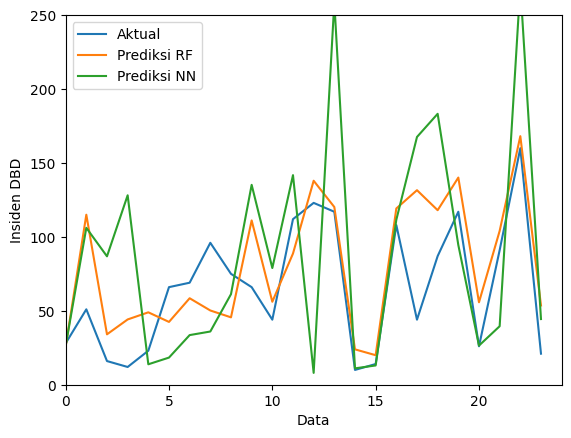

In [ ]:
plt.plot(y_test.values, label='Aktual')
plt.plot(y_pred, label='Prediksi RF')
plt.plot(y_predNN, label='Prediksi NN')
plt.axis([0, len(y_test), 0, 250])
plt.xlabel('Data')
plt.ylabel('Insiden DBD')
plt.legend()
plt.show()

In [ ]:
np.arange(len(y_train),len(y_train)+len(y_test))

array([ 94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117])

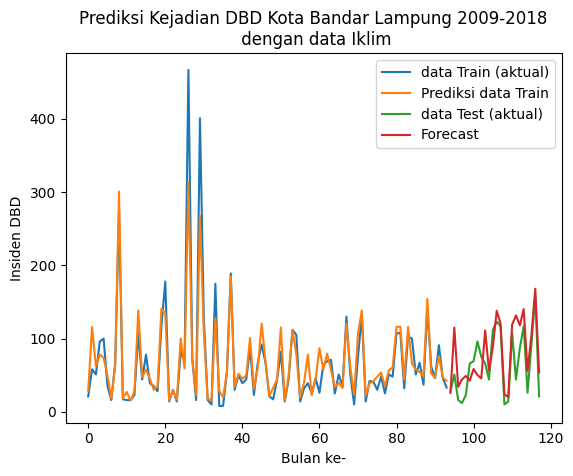

In [ ]:
plt.plot(np.arange(len(y_train)), y_train.values, label='data Train (aktual)')
plt.plot(np.arange(len(y_train)),y_pred_train, label='Prediksi data Train')
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)), y_test.values, label='data Test (aktual)')
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)), y_pred, label='Forecast')
# plt.plot(y_predNN, label='Prediksi NN')
# plt.axis([0, len(y_test), 0, 250])
plt.title('Prediksi Kejadian DBD Kota Bandar Lampung 2009-2018\n dengan data Iklim')
plt.xlabel('Bulan ke-')
plt.ylabel('Insiden DBD')
plt.legend()
plt.show()

# LSTM


In [ ]:
modelLSTM = keras.Sequential()
modelLSTM.add(LSTM(50, return_sequences=True, input_shape=(timesteps, features)))
modelLSTM.add(LSTM(50))
modelLSTM.add(Dense(1))

modelLSTM.compile(loss='mean_squared_error', optimizer='adam')

modelLSTM.fit(X_train_scaled, y_train_scaled, epochs=1000, batch_size=32, validation_split=0.2, verbose=0)

loss = modelLSTM.evaluate(X_test_scaled, y_test_scaled)
print("Mean Squared Error:", loss)

NameError: name 'timesteps' is not defined

In [ ]:
# Membaca data dari file CSV
linkOld = "https://docs.google.com/spreadsheets/d/1R2jmWs7oGG0tJFLgCBdCZu4t6vI1WMk2hgqoeVyYO9Q/pub?output=csv"
oldData = pd.read_csv(linkOld)
oldData = oldData.drop(['Bulan', 'Tahun'], axis=1)
oldData

,Tn,Tx,Tavg,RH_avg,RR,ss,Incidence
0,21.032258,31.483871,27.722581,76.870968,295.687097,4.100000,303
1,21.392857,31.432143,27.357143,78.857143,6.014286,2.432143,155
2,21.387097,32.741935,28.135484,78.000000,9.764516,4.658065,44
3,21.066667,32.383333,28.546667,77.266667,4.076667,5.263333,41
4,21.419355,32.548387,28.609677,77.741935,7.561290,4.887097,25
...,...,...,...,...,...,...,...
115,25.391304,32.535000,28.038095,80.904762,16.033333,6.225000,108
116,25.545455,33.775000,28.600000,76.000000,5.850000,6.658333,39
117,26.157895,33.925000,29.000000,82.000000,1.564286,4.983333,46
118,25.947368,33.300000,28.500000,82.444444,1.668750,4.427778,66


In [ ]:
# prompt: create LSTM model from oldData. Please recreate the scaling separated from what i have create

# Memastikan tidak ada nilai yang hilang
oldData = oldData.dropna()

# Memisahkan fitur dan target
X_old = oldData.drop('Incidence', axis=1)
y_old = oldData['Incidence']

# Scaling data
scaler_old = MinMaxScaler()
X_old_scaled = scaler_old.fit_transform(X_old)
scalerY_old = MinMaxScaler()
y_old_scaled = scalerY_old.fit_transform(y_old.values.reshape(-1, 1))

# Membuat model LSTM
modelLSTM = keras.Sequential()
modelLSTM.add(LSTM(50, return_sequences=True, input_shape=(X_old_scaled.shape[1],)))
modelLSTM.add(LSTM(50))
modelLSTM.add(Dense(1))

modelLSTM.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
modelLSTM.fit(X_old_scaled, y_old_scaled, epochs=1000, batch_size=32, validation_split=0.2, verbose=0)

# Evaluasi model
loss = modelLSTM.evaluate(X_old_scaled, y_old_scaled)
print("Mean Squared Error:", loss)

# Prediksi
y_pred_scaled = modelLSTM.predict(X_old_scaled)
y_pred_old = scalerY_old.inverse_transform(y_pred_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 6)